<a href="https://colab.research.google.com/github/dewayneh57/ACS5513/blob/main/ACS_5513_Petabyte_Pirates_Project_Deliverable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ames Housing - Project Deliverable 1
**ACS-5513 - Applied Machine Learning**

**Dr. Neelam Dwivedi**

**Petabyte Pirates (Team A)**

**Source:** https://www.kaggle.com/datasets/prevek18/ames-housing-dataset


In [1]:
# imports
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
from scipy import stats

# options
pd.set_option("display.max_columns", None)

file_path = "AmesHousing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prevek18/ames-housing-dataset",
  file_path,
)

print(df.shape)
df.head(20)

C:\Users\Dewayne\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.
Matplotlib is building the font cache; this may take a moment.
C:\Users\Dewayne\AppData\Local\Temp\ipykernel_11856\1343146794.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(
C:\Users\Dewayne\AppData\Local\Temp\ipykernel_11856\1343146794.py:15: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 941k/941k [00:00<00:00, 4.16MB/s]

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.

In [2]:
df.info(verbose=False)
df.describe().T[['mean','std','min','max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 82 entries, Order to SalePrice
dtypes: float64(11), int64(28), object(43)
memory usage: 1.8+ MB


,mean,std,min,max
Order,1.465500e+03,8.459625e+02,1.0,2.930000e+03
PID,7.144645e+08,1.887308e+08,526301100.0,1.007100e+09
MS SubClass,5.738737e+01,4.263802e+01,20.0,1.900000e+02
Lot Frontage,6.922459e+01,2.336533e+01,21.0,3.130000e+02
Lot Area,1.014792e+04,7.880018e+03,1300.0,2.152450e+05
Overall Qual,6.094881e+00,1.411026e+00,1.0,1.000000e+01
Overall Cond,5.563140e+00,1.111537e+00,1.0,9.000000e+00
Year Built,1.971356e+03,3.024536e+01,1872.0,2.010000e+03
Year Remod/Add,1.984267e+03,2.086029e+01,1950.0,2.010000e+03
Mas Vnr Area,1.018968e+02,1.791126e+02,0.0,1.600000e+03


In [3]:
# Convert 'NaN' string literals to missing values prior to missing values analysis.
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].replace("NaN", np.nan)

In [4]:
# Check the percentage of values that are missing.
# Heuristic: if > 60% of values are missing, drop these columns.
miss = df.isna().mean().sort_values(ascending=False)
miss.head(25)

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Mas Vnr Type      0.605802
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Cond       0.054266
Garage Finish     0.054266
Garage Yr Blt     0.054266
Garage Qual       0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Qual         0.027304
Bsmt Cond         0.027304
BsmtFin Type 1    0.027304
Mas Vnr Area      0.007850
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
BsmtFin SF 1      0.000341
Garage Cars       0.000341
Electrical        0.000341
Total Bsmt SF     0.000341
Bsmt Unf SF       0.000341
dtype: float64

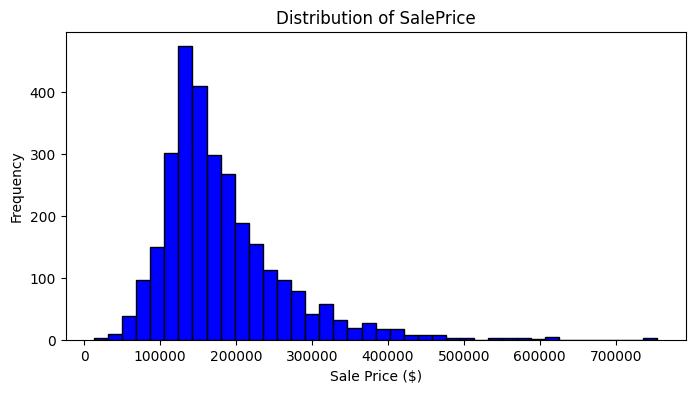

Skewness: 1.74


In [5]:
plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", df['SalePrice'].skew().round(2))

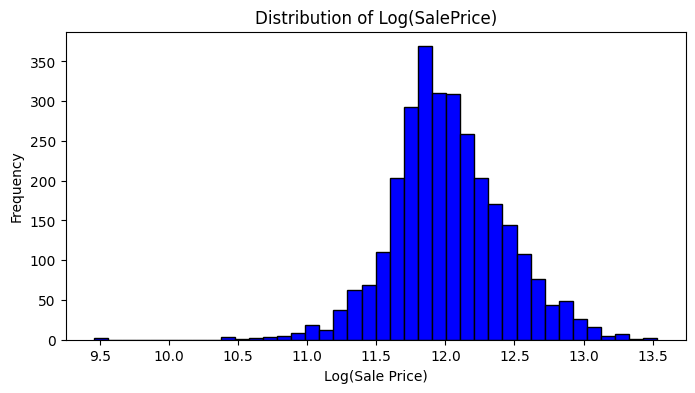

In [6]:
log_df = df.copy()
log_df['SalePrice'] = np.log(df['SalePrice'])

plt.figure(figsize=(8,4))
plt.hist(log_df['SalePrice'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of Log(SalePrice)')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

Number of outliers: 82


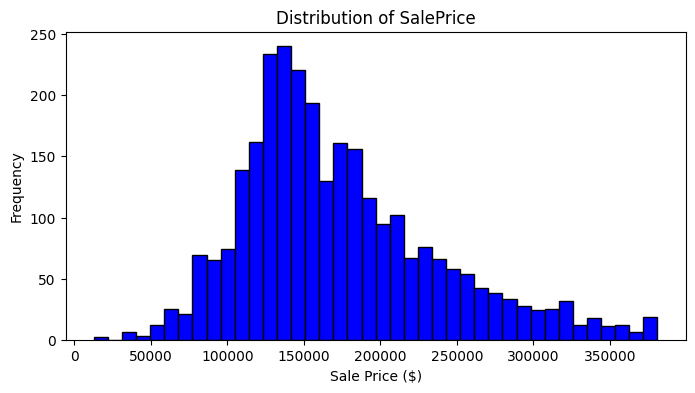

In [7]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (2 * IQR)
upper_bound = Q3 + (2 * IQR)

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print("Number of outliers:", len(outliers))

df.drop(outliers.index, inplace=True)

plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

## Categorical Exploratory Data Analysis

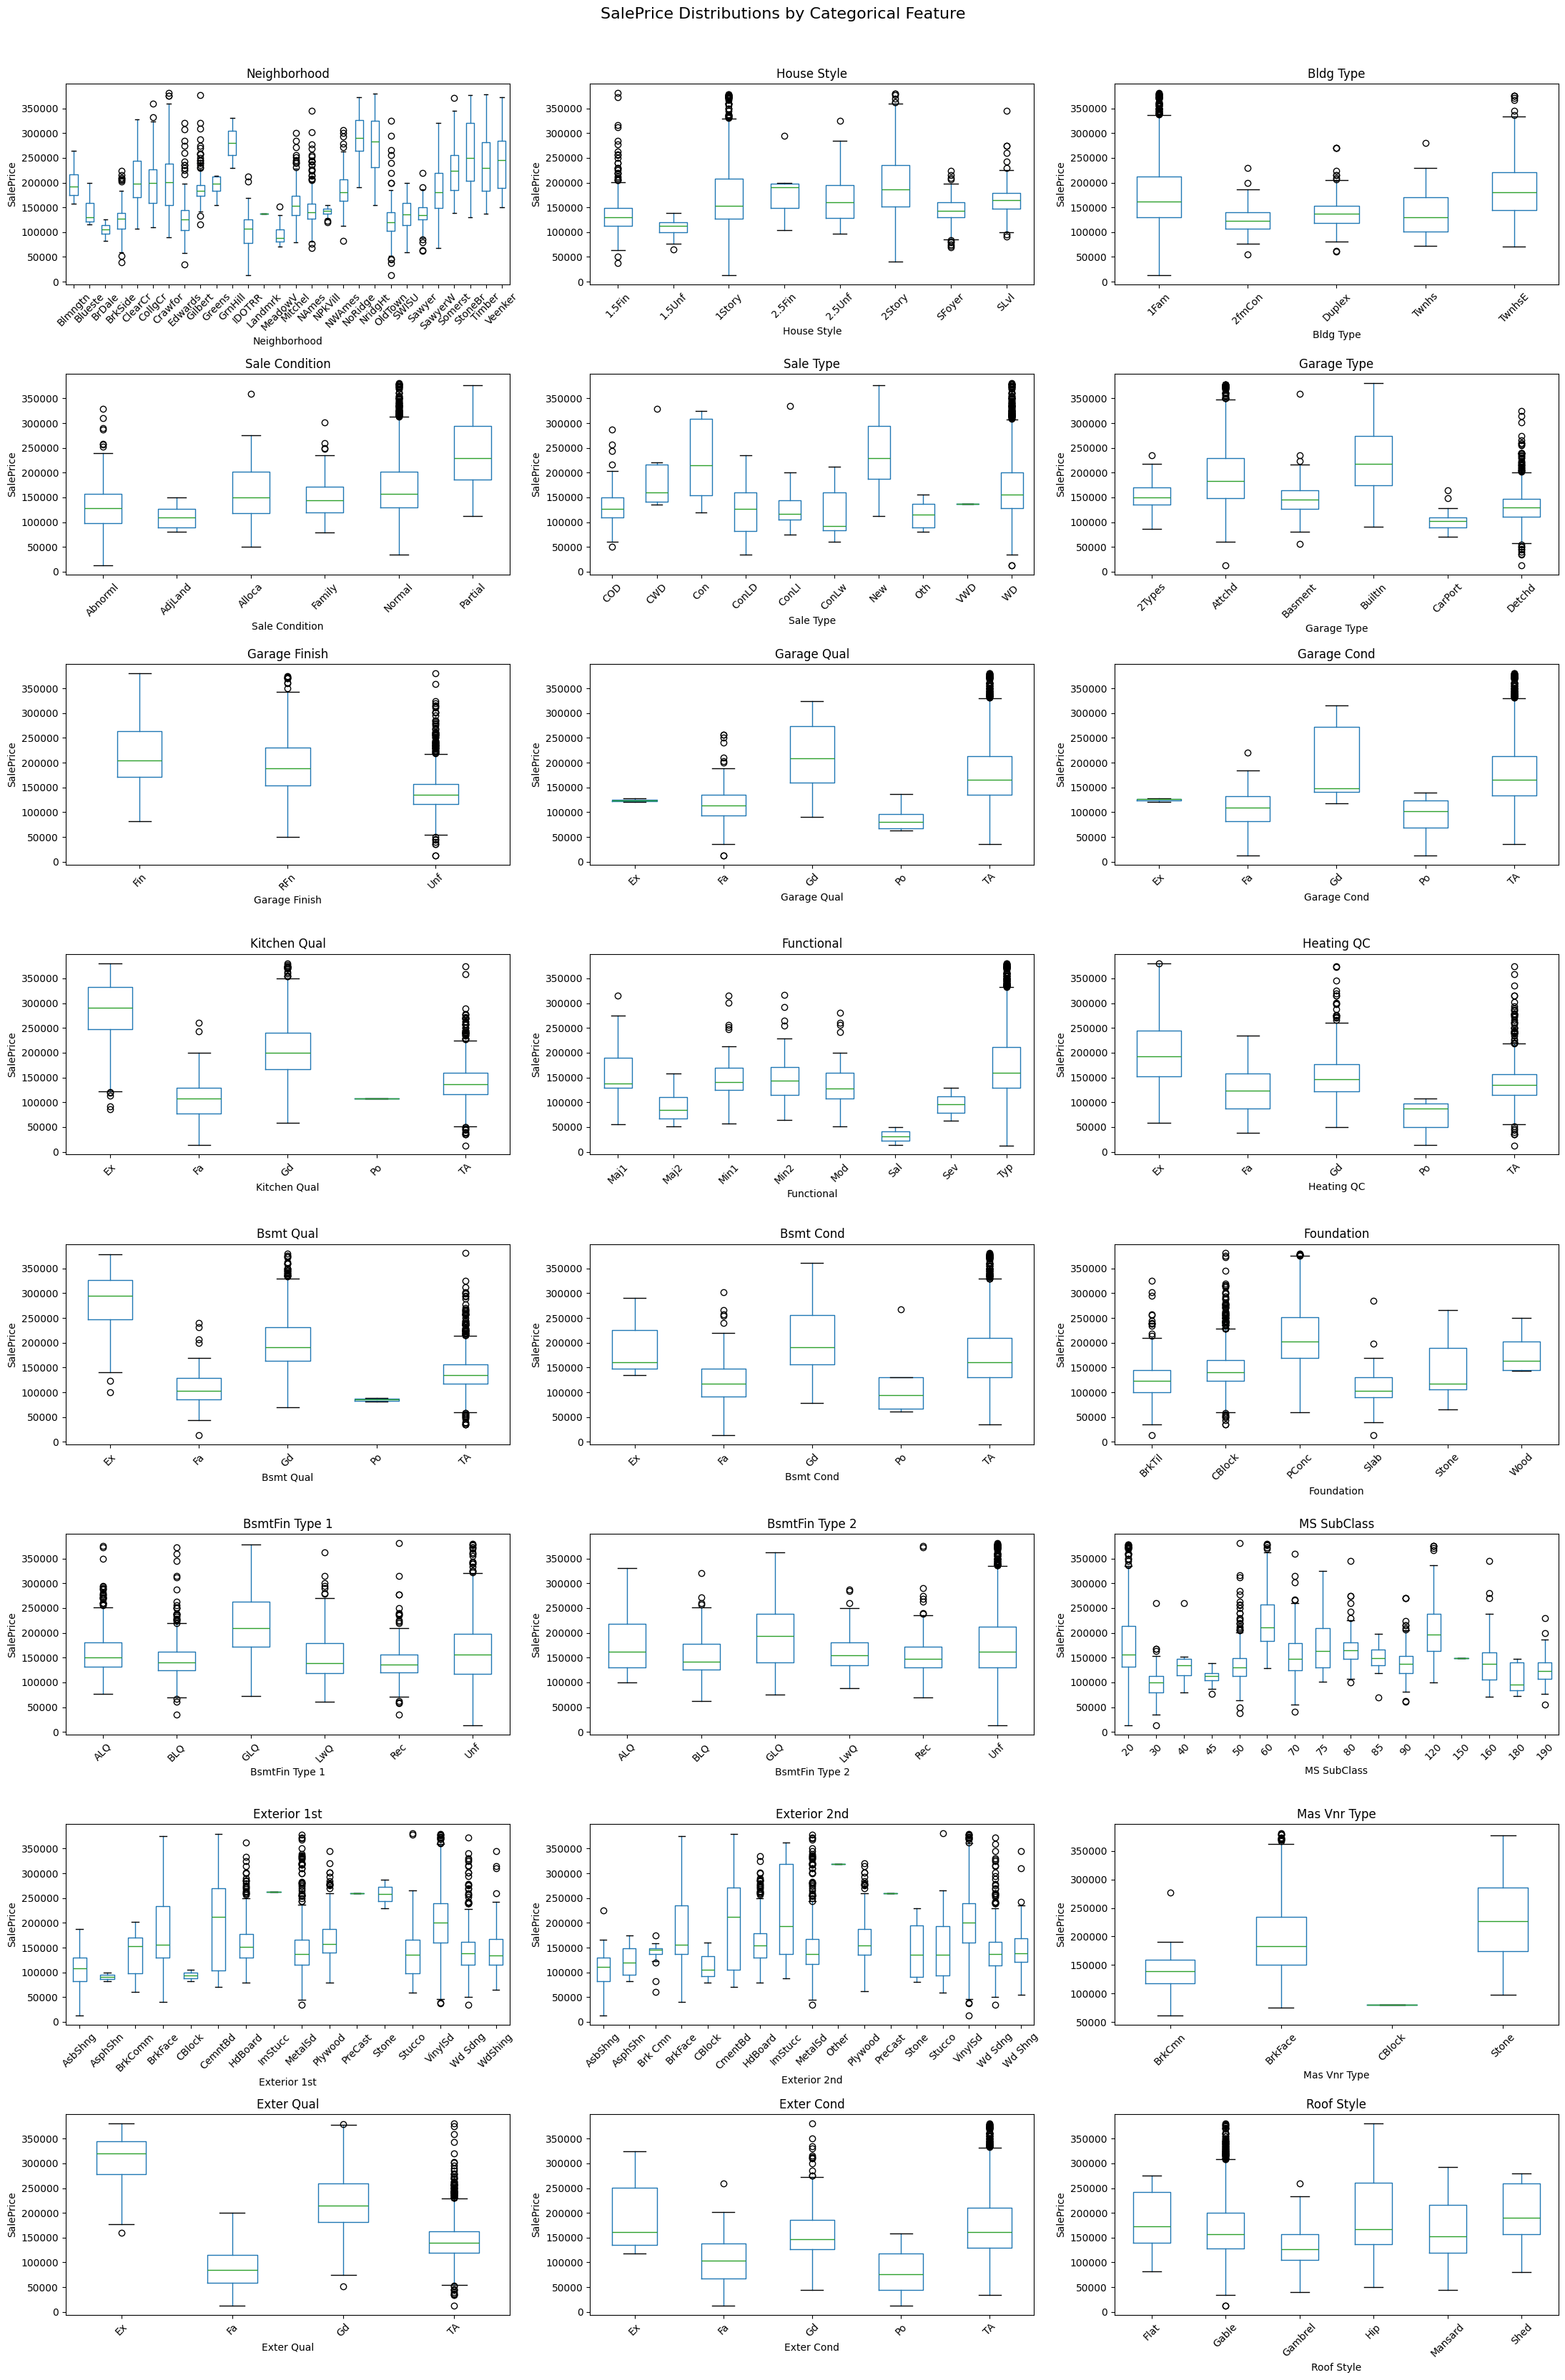

In [8]:
focus_categories = [
    'Neighborhood', 'House Style', 'Bldg Type', 'Sale Condition',
    'Sale Type', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
    'Kitchen Qual', 'Functional', 'Heating QC', 'Bsmt Qual', 'Bsmt Cond',
    'Foundation', 'BsmtFin Type 1', 'BsmtFin Type 2', 'MS SubClass',
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
    'Roof Style'
]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(22, 35))
axes = axes.flatten()

for i, col in enumerate(focus_categories):
    ax = axes[i]
    df.boxplot(column='SalePrice', by=col, ax=ax, rot=45, grid=False)
    ax.set_title(f'{col}')
    ax.set_ylabel('SalePrice')

for j in range(len(focus_categories), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('SalePrice Distributions by Categorical Feature', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Box Plot Interpretation

#### Neighborhood
This is a prime candidate for one hot encoding as there is clear separation in median and IQR. For instance: NoRidge, NWAmes, and Greens have the highest medians while Landmrk and Blueste are the lowest. There are a decent amount of outliers (outside 1.5 * IQR upper bound or lower bound).

#### House Style
1 Story Houses have the highest spread, with a ton of outliers. 2 Story houses unsurprisingly have the highest median, but 1.5 story (e.g. small loft) houses surprisingly have lower medians than both.

#### Building Type
Single Family detached homes have the highest ceiling, but townhomes command a higher median price.

#### To be continued...

## Review suspect columns

Description: there are columns that appear to have only a few distinct values. Heuristic: if one value has >90% of the data, we will drop these columns.

In [9]:
# Just under 50% of values for Fireplace Quality are missing. View counts of records by quality.
display(df['Fireplace Qu'].value_counts(dropna=False))
display(df['Street'].value_counts(dropna=False)) #drop street
display(df['Heating'].value_counts(dropna=False)) #drop heating
display(df['Roof Matl'].value_counts(dropna=False)) #drop roof matl
display(df['Electrical'].value_counts(dropna=False)) #drop electrical
display(df['Utilities'].value_counts(dropna=False)) #drop utilities
display(df['Alley'].value_counts(dropna=False)) #drop alley
display(df['Fence'].value_counts(dropna=False)) #drop fence

Fireplace Qu
NaN    1422
Gd      689
TA      589
Fa       75
Po       46
Ex       27
Name: count, dtype: int64

Street
Pave    2836
Grvl      12
Name: count, dtype: int64

Heating
GasA     2803
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

Roof Matl
CompShg    2808
Tar&Grv      23
WdShake       9
WdShngl       4
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: count, dtype: int64

Electrical
SBrkr    2600
FuseA     188
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: count, dtype: int64

Utilities
AllPub    2845
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

Alley
NaN     2650
Grvl     120
Pave      78
Name: count, dtype: int64

Fence
NaN      2280
MnPrv     328
GdPrv     116
GdWo      112
MnWw       12
Name: count, dtype: int64

In [10]:
numeric_cols = df.select_dtypes(include=np.number)
missing_numeric = numeric_cols.isnull().sum()

print("Missing values in numeric columns:")
print(missing_numeric[missing_numeric > 0])

Missing values in numeric columns:
Lot Frontage      487
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64


## Engineered Features

### Age

1.   Age of Home at Time of Sale (Yr Sold - Yr Built)
1.   Time Since Remodel (Yr Sold - Yr Remod or Add)
1.   Age Bucket

### Size and Quality

1.   Total Square Feet
1.   Total Square Feet + Garage
1.   Total Baths (Full Bath + 0.5 * Half Bath)
1.   Number of Stories
1.   Price per Square Feet
1.   Overall Quality x Size

### Binary Features
1.   Has Basement (0, 1)
1.   Has Central Air (0, 1)
1.   Has Fireplace (0, 1)
1.   Has Porch (0, 1)
1.   Has Deck (0, 1)
1.   Has Garage (0, 1)
1.   Has Been Remodeled (0, 1), If Year Remod / Add > Year Build then 1 else 0

### Time

1.   Season Sold (calculated by Mo Sold)

## Features with potential high impact on sale price

1.   Lot Size
1.   Year Built
1.   Overall Quality
1.   Overall Condition
1.   Lot Configuration
1.   House Style (ex. 1 Story, 2 Story)
1.   Year Remodeled (Remod / Add)
1.   Basement Feature

## Data Enrichment and Engineering

In [11]:
# Age
df['House Age'] = df['Yr Sold'] - df['Year Built']
df['Remodel Age'] = df['Yr Sold'] - df['Year Remod/Add']
df['Age Bucket'] = pd.cut(df['House Age'], bins=[-1,10,30,60,300],
                          labels=['≤10','11-30','30-60','60+'])

# Size and Quality
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
df['Total SF Plus Garage'] = df['Total SF'] + df['Garage Area']
df['Total Baths'] = df['Full Bath'] + 0.5 * df['Half Bath']
df['Number of Stories'] = df['2nd Flr SF'].apply(lambda x: 2 if x > 0 else 1)
df['Price per SF'] = df['SalePrice'] / df['Total SF']
df['Qual x SF'] = df['Overall Qual'] * df['Total SF']

# Binary Features
df['Has Basement'] = df['Bsmt Qual'].notna().astype(int)
df['Has Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})
df['Has Pool'] = df['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
df['Has Fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

total_porch_area = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch']
+ df['Screen Porch']

df['Has Porch'] = total_porch_area.apply(lambda x: 1 if x > 0 else 0)
df['Has Deck'] = df['Wood Deck SF'].apply(lambda x: 1 if x > 0 else 0)
df['Has Garage'] = df['Garage Area'].apply(lambda x: 1 if x > 0 else 0)
df['Has Remodeled'] = df.apply(lambda row: 1 if row['Year Remod/Add'] > row['Year Built'] else 0, axis=1)


# Time
df['Season Sold'] = df['Mo Sold'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                        else 'Spring' if x in [3, 4, 5]
                                        else 'Summer' if x in [6, 7, 8]
                                        else 'Fall')



In [12]:
# Age
correlation_house_age = df['House Age'].corr(df['SalePrice'])
correlation_remodel_age = df['Remodel Age'].corr(df['SalePrice'])

print("Correlation with 'House Age':", correlation_house_age)
print("Correlation with 'Remodel Age':", correlation_remodel_age)

# Size and Quality
correlation_total_sf = df['Total SF'].corr(df['SalePrice'])
correlation_total_sf_plus_garage = df['Total SF Plus Garage'].corr(df['SalePrice'])
correlation_total_baths = df['Total Baths'].corr(df['SalePrice'])
correlation_number_of_stories = df['Number of Stories'].corr(df['SalePrice'])
correlation_qual_x_sf = df['Qual x SF'].corr(df['SalePrice'])
correlation_total_bedrooms = df['Bedroom AbvGr'].corr(df['SalePrice']) #drop
correlation_total_rooms = df['TotRms AbvGrd'].corr(df['SalePrice'])
correlation_garage_cars = df['Garage Cars'].corr(df['SalePrice'])
correlation_overall_qual = df['Overall Qual'].corr(df['SalePrice'])
correlation_overall_cond = df['Overall Cond'].corr(df['SalePrice']) #drop
correlation_lot_area = df['Lot Area'].corr(df['SalePrice']) #drop
correlation_gr_liv_area = df['Gr Liv Area'].corr(df['SalePrice'])
correlation_garage_area = df['Garage Area'].corr(df['SalePrice'])
correlation_wood_deck_sf = df['Wood Deck SF'].corr(df['SalePrice']) #drop

print("Correlation with 'Total SF':", correlation_total_sf)
print("Correlation with 'Total SF Plus Garage':", correlation_total_sf_plus_garage)
print("Correlation with 'Total Baths':", correlation_total_baths)
print("Correlation with 'Number of Stories':", correlation_number_of_stories)
print("Correlation with 'Qual x SF':", correlation_qual_x_sf)
print("Correlation with 'Total Bedrooms':", correlation_total_bedrooms)
print("Correlation with 'Total Rooms':", correlation_total_rooms)
print("Correlation with 'Garage Cars':", correlation_garage_cars)
print("Correlation with 'Overall Qual':", correlation_overall_qual)
print("Correlation with 'Overall Cond':", correlation_overall_cond)
print("Correlation with 'Lot Area':", correlation_lot_area)
print("Correlation with 'Gr Liv Area':", correlation_gr_liv_area)
print("Correlation with 'Garage Area':", correlation_garage_area)
print("Correlation with 'Wood Deck SF':", correlation_wood_deck_sf)

# Binary Features
correlation_has_basement = df['Has Basement'].corr(df['SalePrice'])
correlation_central_air = df['Has Central Air'].corr(df['SalePrice']) #drop
correlation_has_pool = df['Has Pool'].corr(df['SalePrice']) #drop
correlation_has_fireplace = df['Has Fireplace'].corr(df['SalePrice'])
correlation_has_porch = df['Has Porch'].corr(df['SalePrice'])
correlation_has_deck = df['Has Deck'].corr(df['SalePrice'])
correlation_has_garage = df['Has Garage'].corr(df['SalePrice'])
correlation_has_remodeled = df['Has Remodeled'].corr(df['SalePrice'])

print("Correlation with 'Has Basement':", correlation_has_basement)
print("Correlation with 'Has Central Air':", correlation_central_air)
print("Correlation with 'Has Pool':", correlation_has_pool)
print("Correlation with 'Has Fireplace':", correlation_has_fireplace)
print("Correlation with 'Has Porch':", correlation_has_porch)
print("Correlation with 'Has Deck':", correlation_has_deck)
print("Correlation with 'Has Garage':", correlation_has_garage)
print("Correlation with 'Has Remodeled':", correlation_has_remodeled)


Correlation with 'House Age': -0.5890214724055594
Correlation with 'Remodel Age': -0.5612474528413177
Correlation with 'Total SF': 0.7521764722031156
Correlation with 'Total SF Plus Garage': 0.7898229480469613
Correlation with 'Total Baths': 0.5956729253207519
Correlation with 'Number of Stories': 0.10070893359781774
Correlation with 'Qual x SF': 0.8375508896770719
Correlation with 'Total Bedrooms': 0.15476590250371378
Correlation with 'Total Rooms': 0.44487555926694594
Correlation with 'Garage Cars': 0.6445119556382248
Correlation with 'Overall Qual': 0.7953332098222912
Correlation with 'Overall Cond': -0.07750034976832787
Correlation with 'Lot Area': 0.2355740482879849
Correlation with 'Gr Liv Area': 0.667442464105927
Correlation with 'Garage Area': 0.6228350592897501
Correlation with 'Wood Deck SF': 0.3112602853706307
Correlation with 'Has Basement': 0.17393267882139865
Correlation with 'Has Central Air': 0.3006542804065921
Correlation with 'Has Pool': 0.040364182127577336
Correlati

In [13]:
# correlation between all numerical features and SalePrice, excluding objects
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
Qual x SF               0.837551
Overall Qual            0.795333
Total SF Plus Garage    0.789823
Total SF                0.752176
Gr Liv Area             0.667442
Garage Cars             0.644512
Garage Area             0.622835
Total Baths             0.595673
Price per SF            0.591342
Year Built              0.588861
Total Bsmt SF           0.571367
Full Bath               0.564496
Year Remod/Add          0.559571
1st Flr SF              0.557386
Garage Yr Blt           0.547140
Has Fireplace           0.492453
Fireplaces              0.468035
TotRms AbvGrd           0.444876
Mas Vnr Area            0.399298
BsmtFin SF 1            0.347950
Lot Frontage            0.324886
Open Porch SF           0.317559
Has Deck                0.317272
Has Porch               0.311548
Wood Deck SF            0.311260
Has Central Air         0.300654
Half Bath               0.274913
2nd Flr SF              0.269134
Has Garage              0.255371
Bsmt Full 

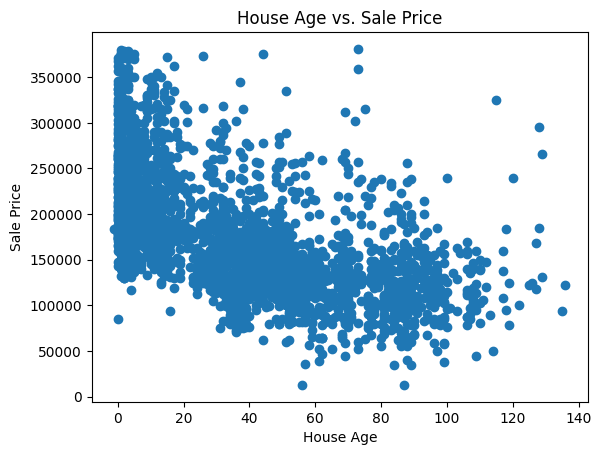

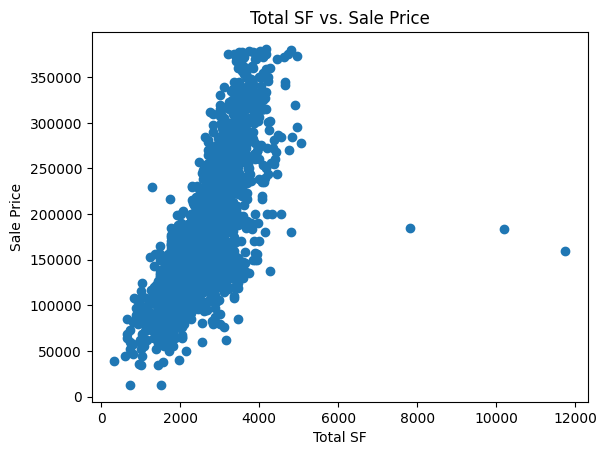

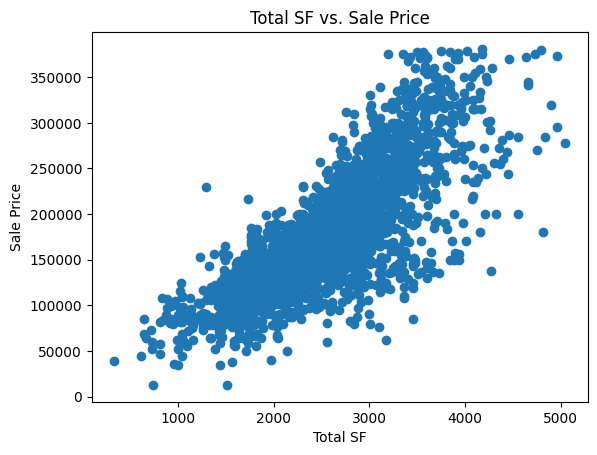

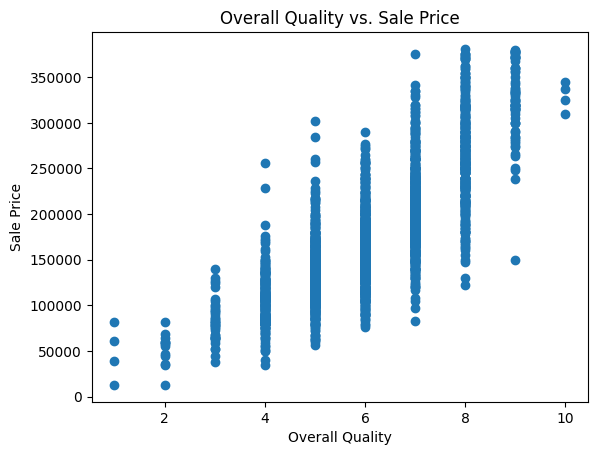

In [14]:
plt.scatter(df['House Age'], df['SalePrice'])
plt.title('House Age vs. Sale Price')
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.show()

plt.scatter(df['Total SF'], df['SalePrice'])
plt.title('Total SF vs. Sale Price')
plt.xlabel('Total SF')
plt.ylabel('Sale Price')
plt.show()

# drop values where Total SF > 6000
df.drop(df[df['Total SF'] > 6000].index, inplace=True)

plt.scatter(df['Total SF'], df['SalePrice'])
plt.title('Total SF vs. Sale Price')
plt.xlabel('Total SF')
plt.ylabel('Sale Price')
plt.show()

plt.scatter(df['Overall Qual'], df['SalePrice'])
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

## Data Cleaning and Encoding

### Cleaning

1. Dropping features that are unique to the record as these are not necessary for regression and overall analysis (e.g. PID).
1. Dropping features identified previously to have the vast majority of values in one specific category.

### Encoding

1. Ordinal map - for categorical data, assign numerical values (e.g. quality, condition features)

In [15]:
# Clean
df.drop(columns=['Order', 'PID', 'Street', 'Heating', 'Roof Matl',
                 'Electrical', 'Utilities', 'Alley'])
# Encode
ordinal_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
    'Fin': 3,
    'Unf': 2,
    'RFn': 1,
    'Y': 1,
    'N': 0,
    'Typ': 8,
    'Min1': 7,
    'Min2': 6,
    'Mod': 5,
    'Maj1': 4,
    'Maj2': 3,
    'Sev': 2,
    'Sal': 1,
    'GdPrv': 2,
    'MnPrv': 1,
    'GdWo': 2,
    'MnWw': 1

}

for col in ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC',
            'Kitchen Qual', 'Fireplace Qu', 'Garage Finish','Functional',
            'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']:
    df[col+'_Ord'] = df[col].map(ordinal_map)

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,House Age,Remodel Age,Age Bucket,Total SF,Total SF Plus Garage,Total Baths,Number of Stories,Price per SF,Qual x SF,Has Basement,Has Central Air,Has Pool,Has Fireplace,Has Porch,Has Deck,Has Garage,Has Remodeled,Season Sold,Exter Qual_Ord,Exter Cond_Ord,Bsmt Qual_Ord,Bsmt Cond_Ord,Heating QC_Ord,Kitchen Qual_Ord,Fireplace Qu_Ord,Garage Finish_Ord,Functional_Ord,Garage Qual_Ord,Garage Cond_Ord,Pool QC_Ord,Fence_Ord
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,50,50,30-60,2736.0,3264.0,1.0,1,78.581871,16416.0,1,1,0,1,1,1,1,0,Spring,3,3,3.0,4.0,2,3,4.0,3.0,8,3.0,3.0,NaN,NaN
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,49,49,30-60,1778.0,2508.0,1.0,1,59.055118,8890.0,1,1,0,0,0,1,1,0,Summer,3,3,3.0,3.0,3,3,NaN,2.0,8,3.0,3.0,NaN,1.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,52,52,30-60,2658.0,2970.0,1.5,1,64.710309,15948.0,1,1,0,0,1,1,1,0,Summer,3,3,3.0,3.0,3,4,NaN,2.0,8,3.0,3.0,NaN,NaN
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,42,42,30-60,4220.0,4742.0,2.5,1,57.819905,29540.0,1,1,0,1,0,0,1,0,Spring,4,3,3.0,3.0,5,5,3.0,3.0,8,3.0,3.0,NaN,NaN
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,13,12,11-30,2557.0,3039.0,2.5,2,74.266719,12785.0,1,1,0,1,1,1,1,1,Spring,3,3,4.0,3.0,4,3,3.0,3.0,8,3.0,3.0,NaN,1.0


In [ ]:
# Display the values of the overall quality feature
print(df['Overall Qual'].value_counts().sort_index())
df['Overall Qual'].describe()

Overall Qual
1       4
2      13
3      40
4     226
5     825
6     731
7     601
8     332
9      69
10      4
Name: count, dtype: int64


count    2845.000000
mean        6.006678
std         1.327370
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

: 